#**Exercício sobre Search Grid**

Fonte de Dados: https://www.kaggle.com/datasets/prathamtripathi/drug-classification

Importar bibliotecas

In [200]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


Ler arquivo

In [201]:
df = pd.read_csv('/content/drive/MyDrive/datasets/drug200.csv')
df.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


Observando informações das variáveis

In [202]:
df['Age'].unique()

# Tratar como escala :
# >50 (SIM-1 e NÃO 0)

array([23, 47, 28, 61, 22, 49, 41, 60, 43, 34, 74, 50, 16, 69, 32, 57, 63,
       48, 33, 31, 39, 45, 18, 65, 53, 46, 15, 73, 58, 66, 37, 68, 67, 62,
       24, 26, 40, 38, 29, 17, 54, 70, 36, 19, 64, 59, 51, 42, 56, 20, 72,
       35, 52, 55, 30, 21, 25])

In [203]:
df['Sex'].unique()

# F (SIM-1 e NÃO 0)

array(['F', 'M'], dtype=object)

In [204]:
df['BP'].unique()

# Dummie

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [205]:
df['Cholesterol'].unique()

# HIGH (SIM-1 e NÃO 0)

array(['HIGH', 'NORMAL'], dtype=object)

In [206]:
df['Na_to_K'].unique()

array([25.355, 13.093, 10.114,  7.798, 18.043,  8.607, 16.275, 11.037,
       15.171, 19.368, 11.767, 19.199, 15.376, 20.942, 12.703, 15.516,
       11.455, 13.972,  7.298, 25.974, 19.128, 25.917, 30.568, 15.036,
       33.486, 18.809, 30.366,  9.381, 22.697, 17.951,  8.75 ,  9.567,
       11.014, 31.876, 14.133,  7.285,  9.445, 13.938,  9.709,  9.084,
       19.221, 14.239, 15.79 , 12.26 , 12.295,  8.107, 13.091, 10.291,
       31.686, 19.796, 19.416, 10.898, 27.183, 18.457, 10.189, 14.16 ,
       11.34 , 27.826, 10.091, 18.703, 29.875,  9.475, 20.693,  8.37 ,
       13.303, 27.05 , 12.856, 10.832, 24.658, 24.276, 13.967, 19.675,
       10.605, 22.905, 17.069, 20.909, 11.198, 19.161, 13.313, 10.84 ,
       13.934,  7.761,  9.712, 11.326, 10.067, 13.935, 13.597, 15.478,
       23.091, 17.211, 16.594, 15.156, 29.45 , 29.271, 15.015, 11.424,
       38.247, 25.395, 35.639, 16.725, 11.871, 12.854, 13.127,  8.966,
       28.294,  8.968, 11.953, 20.013,  9.677, 16.85 ,  7.49 ,  6.683,
      

In [207]:
df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [208]:
df['Age>50'] = df['Age'].apply(lambda x: 1 if x > 50 else 0)

In [209]:
df1 = pd.get_dummies(df[['BP']], prefix='BP') # Pass a list of columns
df = pd.concat([df, df1], axis=1)
df.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Age>50,BP_HIGH,BP_LOW,BP_NORMAL
0,23,F,HIGH,HIGH,25.355,DrugY,0,True,False,False
1,47,M,LOW,HIGH,13.093,drugC,0,False,True,False
2,47,M,LOW,HIGH,10.114,drugC,0,False,True,False
3,28,F,NORMAL,HIGH,7.798,drugX,0,False,False,True
4,61,F,LOW,HIGH,18.043,DrugY,1,False,True,False


In [210]:
drug_mapping = {drug: i for i, drug in enumerate(df['Drug'].unique())}
df['Drug'] = df['Drug'].map(drug_mapping)
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Age>50,BP_HIGH,BP_LOW,BP_NORMAL
0,23,F,HIGH,HIGH,25.355,0,0,True,False,False
1,47,M,LOW,HIGH,13.093,1,0,False,True,False
2,47,M,LOW,HIGH,10.114,1,0,False,True,False
3,28,F,NORMAL,HIGH,7.798,2,0,False,False,True
4,61,F,LOW,HIGH,18.043,0,1,False,True,False


In [211]:
df = df.replace({False: 0, True: 1})
df.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Age>50,BP_HIGH,BP_LOW,BP_NORMAL
0,23,F,HIGH,HIGH,25.355,0,0,1,0,0
1,47,M,LOW,HIGH,13.093,1,0,0,1,0
2,47,M,LOW,HIGH,10.114,1,0,0,1,0
3,28,F,NORMAL,HIGH,7.798,2,0,0,0,1
4,61,F,LOW,HIGH,18.043,0,1,0,1,0


In [212]:
print(df['Sex'].value_counts())
print(df['Cholesterol'].value_counts())

df['Female'] = df.apply(lambda row: 1 if row['Sex'] == 'F' else 0, axis=1)
df['C_HIGH'] = df.apply(lambda row: 1 if row['Cholesterol'] == 'HIGH' else 0, axis=1)

print(df['Female'].value_counts())
print(df['C_HIGH'].value_counts())

Sex
M    104
F     96
Name: count, dtype: int64
Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64
Female
0    104
1     96
Name: count, dtype: int64
C_HIGH
1    103
0     97
Name: count, dtype: int64


In [213]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Age>50,BP_HIGH,BP_LOW,BP_NORMAL,Female,C_HIGH
0,23,F,HIGH,HIGH,25.355,0,0,1,0,0,1,1
1,47,M,LOW,HIGH,13.093,1,0,0,1,0,0,1
2,47,M,LOW,HIGH,10.114,1,0,0,1,0,0,1
3,28,F,NORMAL,HIGH,7.798,2,0,0,0,1,1,1
4,61,F,LOW,HIGH,18.043,0,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,1,1,0,1,0,1,1
196,16,M,LOW,HIGH,12.006,1,0,0,1,0,0,1
197,52,M,NORMAL,HIGH,9.894,2,1,0,0,1,0,1
198,23,M,NORMAL,NORMAL,14.020,2,0,0,0,1,0,0


In [214]:
df1 = df.copy()
del df1['Age']
del df1['Sex']
del df1['BP']
del df1['Cholesterol']
df1.head()

,Na_to_K,Drug,Age>50,BP_HIGH,BP_LOW,BP_NORMAL,Female,C_HIGH
0,25.355,0,0,1,0,0,1,1
1,13.093,1,0,0,1,0,0,1
2,10.114,1,0,0,1,0,0,1
3,7.798,2,0,0,0,1,1,1
4,18.043,0,1,0,1,0,1,1


# Aplicação RF


In [215]:
x = df1.drop('Drug', axis='columns')
y = df1['Drug']

params = {
  'random_state':[True],
  'n_estimators': [5, 25, 5],
  'max_depth': range(1,15)
}

gs = GridSearchCV(RandomForestClassifier(), param_grid=params, scoring='accuracy')
gs.fit(x, y)
print(gs.score(x, y))
best_estimator = gs.best_estimator_

1.0


In [216]:
gs.best_params_

{'max_depth': 4, 'n_estimators': 25, 'random_state': True}

In [217]:
results = pd.DataFrame(gs.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011412,0.002367,0.003160,0.000790,1,5,True,"{'max_depth': 1, 'n_estimators': 5, 'random_st...",0.675,0.650,0.625,0.600,0.625,0.635,0.025495,41
1,0.037963,0.003769,0.004732,0.001189,1,25,True,"{'max_depth': 1, 'n_estimators': 25, 'random_s...",0.750,0.650,0.625,0.600,0.625,0.650,0.052440,40
2,0.013849,0.006438,0.003070,0.000658,1,5,True,"{'max_depth': 1, 'n_estimators': 5, 'random_st...",0.675,0.650,0.625,0.600,0.625,0.635,0.025495,41
3,0.012742,0.001145,0.003359,0.000155,2,5,True,"{'max_depth': 2, 'n_estimators': 5, 'random_st...",0.850,0.825,0.825,0.800,0.825,0.825,0.015811,38
4,0.051493,0.003792,0.005781,0.000946,2,25,True,"{'max_depth': 2, 'n_estimators': 25, 'random_s...",0.850,0.850,0.850,0.900,0.825,0.855,0.024495,37
5,0.013710,0.000712,0.004263,0.000951,2,5,True,"{'max_depth': 2, 'n_estimators': 5, 'random_st...",0.850,0.825,0.825,0.800,0.825,0.825,0.015811,38
6,0.013531,0.002962,0.003095,0.000472,3,5,True,"{'max_depth': 3, 'n_estimators': 5, 'random_st...",0.950,0.925,0.925,0.950,0.950,0.940,0.012247,35
7,0.038575,0.001826,0.003980,0.000339,3,25,True,"{'max_depth': 3, 'n_estimators': 25, 'random_s...",1.000,0.950,1.000,0.950,0.950,0.970,0.024495,34
8,0.009744,0.000739,0.003007,0.000688,3,5,True,"{'max_depth': 3, 'n_estimators': 5, 'random_st...",0.950,0.925,0.925,0.950,0.950,0.940,0.012247,35
9,0.010601,0.001160,0.002991,0.000514,4,5,True,"{'max_depth': 4, 'n_estimators': 5, 'random_st...",0.975,1.000,1.000,0.975,1.000,0.990,0.012247,28


In [218]:
params = {
  'random_state':[True],
  'criterion': ['log_loss','gini'],
  'max_depth': range(1,15)
}

gs = GridSearchCV(DecisionTreeClassifier(), param_grid=params, scoring='accuracy')
gs.fit(x, y)
print(gs.score(x, y))

1.0


In [219]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

params = {
  'solver': ['lsqr','svd'],
}

gs = GridSearchCV(LinearDiscriminantAnalysis(), param_grid=params, scoring='accuracy')
gs.fit(x, y)
print(gs.score(x, y))

0.9


<Axes: >

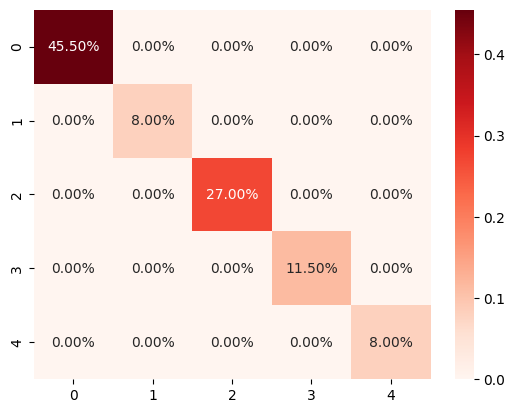

In [220]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

y_pred = best_estimator.predict(x)
matrix = confusion_matrix(y, y_pred)
sns.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%', cmap='Reds')